In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root="/content/drive/MyDrive/MODELS"

In [4]:
import os
os.chdir(root)

In [5]:
!ls

Bert.ipynb	   gold_corpus.csv	  tweet_classifier_BERT_model
data_mixed_rt.csv  google_encoding.ipynb  Untitled0.ipynb
depression.csv	   Suicide_Detection.csv


In [6]:
data=pd.read_csv("data_mixed_rt.csv")
data

,Unnamed: 0,tweet,label
0,0,conservatives are excellent at running up debt...,2
1,1,great example as an immigrant and woman ceo i...,2
2,2,fuckhead for awhile i open two stores for...,2
3,3,i just cracked my motherfuckin phone god damn ...,1
4,4,i could never have a bby by a lil dick thts...,1
...,...,...,...
49517,49524,aye and when the hoes start coming do not ...,1
49518,49525,kevin williamson is excellent piece on why e...,2
49519,49526,in an age where progressives demand full ...,2
49520,49527,all dirty vote bank politics aap rule has mad...,0


In [7]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.rename(columns={'text':'tweet'},inplace=True)
data

,tweet,label
0,conservatives are excellent at running up debt...,2
1,great example as an immigrant and woman ceo i...,2
2,fuckhead for awhile i open two stores for...,2
3,i just cracked my motherfuckin phone god damn ...,1
4,i could never have a bby by a lil dick thts...,1
...,...,...
49517,aye and when the hoes start coming do not ...,1
49518,kevin williamson is excellent piece on why e...,2
49519,in an age where progressives demand full ...,2
49520,all dirty vote bank politics aap rule has mad...,0


In [8]:
data2=pd.read_csv("depression.csv")
data2

,Unnamed: 0,tweet,label
0,0,damn taking this personality quiz and realizin...,4
1,1,remember experiencing as kid what now realize ...,4
2,2,damn louis really did pull me out of my depres...,4
3,3,my depression is really kicking my ass right n...,4
4,4,feel like my night is going bad family calling...,4
...,...,...,...
61995,30995,the only way they can attract good dicks is to...,2
61996,30996,gotta say like you think we have the same atti...,2
61997,30997,many product companies goes from right to left...,2
61998,30998,just casually playing animal crossing while wa...,2


In [9]:
data2.drop("Unnamed: 0",axis=1,inplace=True)
data2

,tweet,label
0,damn taking this personality quiz and realizin...,4
1,remember experiencing as kid what now realize ...,4
2,damn louis really did pull me out of my depres...,4
3,my depression is really kicking my ass right n...,4
4,feel like my night is going bad family calling...,4
...,...,...
61995,the only way they can attract good dicks is to...,2
61996,gotta say like you think we have the same atti...,2
61997,many product companies goes from right to left...,2
61998,just casually playing animal crossing while wa...,2


In [10]:
mask=data2.label==4
data2=data2.loc[mask]
data2

,tweet,label
0,damn taking this personality quiz and realizin...,4
1,remember experiencing as kid what now realize ...,4
2,damn louis really did pull me out of my depres...,4
3,my depression is really kicking my ass right n...,4
4,feel like my night is going bad family calling...,4
...,...,...
46995,love that this is your life paul railing again...,4
46996,all see now why fucking hate cops they are mon...,4
46997,this really just breaks my heart on so many le...,4
46998,currently doing this now and relieved but also...,4


In [11]:
data=pd.concat([data,data2],ignore_index=True)

In [12]:
data.label.value_counts()

4    32000
1    23367
2    19690
0     6465
Name: label, dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data3=pd.read_csv("gold_corpus.csv")
data3

,tweet,label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,$RESERVED$ $MENTION$: GAMEDAY] Fan ejected fro...,6,NaN,NaN,NaN,NaN,NaN
1,$MENTION$ What is your stance on vaping?,6,NaN,NaN,NaN,NaN,NaN
2,Nicotine stans are getting brave,6,NaN,NaN,NaN,NaN,NaN
3,PULSE X BF Kit l by Tony B. and Vandy Vape l A...,6,NaN,NaN,NaN,NaN,NaN
4,$RESERVED$ $MENTION$: FDA Takes $NUMBER$s of D...,6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2111,"You are my nicotine, heroine, novocaine. Fvck....",-1,NaN,NaN,NaN,NaN,NaN
2112,$MENTION$ Maybe but that would be as the assis...,-1,NaN,NaN,NaN,NaN,NaN
2113,$MENTION$ Jasmine : star star they’re smoking ...,-1,NaN,NaN,NaN,NaN,NaN
2114,$RESERVED$ $MENTION$: Think you can smoke or v...,-1,NaN,NaN,NaN,NaN,NaN


In [15]:
data3.tweet=data3.tweet.str.replace("\$RESERVED\$\$MENTION\$", '@$RESERVED$ $MENTION$',regex=True)
data3.tweet=data3.tweet.str.replace("\$MENTION\$", '@$MENTION$',regex=True)
data3.tweet=data3.tweet.str.replace("\$NUMBER\$ ", '#$NUMBER$',regex=True)
data3

,tweet,label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,$RESERVED$ @$MENTION$: GAMEDAY] Fan ejected fr...,6,NaN,NaN,NaN,NaN,NaN
1,@$MENTION$ What is your stance on vaping?,6,NaN,NaN,NaN,NaN,NaN
2,Nicotine stans are getting brave,6,NaN,NaN,NaN,NaN,NaN
3,PULSE X BF Kit l by Tony B. and Vandy Vape l A...,6,NaN,NaN,NaN,NaN,NaN
4,$RESERVED$ @$MENTION$: FDA Takes $NUMBER$s of ...,6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2111,"You are my nicotine, heroine, novocaine. Fvck....",-1,NaN,NaN,NaN,NaN,NaN
2112,@$MENTION$ Maybe but that would be as the assi...,-1,NaN,NaN,NaN,NaN,NaN
2113,@$MENTION$ Jasmine : star star they’re smoking...,-1,NaN,NaN,NaN,NaN,NaN
2114,$RESERVED$ @$MENTION$: Think you can smoke or ...,-1,NaN,NaN,NaN,NaN,NaN


In [16]:
data3.tweet=data3.tweet.str.replace("\$URL\$ ", '$URL.com$',regex=True)

In [17]:
data3.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],axis=1,inplace=True)

In [18]:
data3.label=3
data3.dropna(inplace=True)
data3.label.value_counts()

3    2116
Name: label, dtype: int64

In [19]:
!pip install tweet-preprocessor

In [20]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import preprocessor as p
from nltk.stem import WordNetLemmatizer 
from nltk import sent_tokenize
from nltk import word_tokenize

stop_words = stopwords.words()

def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    
    #using full form in place of abbrevations
    text = re.sub(r"won't", "will not",text)
    text = re.sub(r"can\'t", "can not",text)
    text = re.sub(r"n\'t", " not",text)
    text = re.sub(r"\'re", " are",text)
    text = re.sub(r"\'s", " is",text)
    text = re.sub(r"\'d", " would",text)
    text = re.sub(r"\'ll", " will",text)
    text = re.sub(r"\'t", " not",text)
    text = re.sub(r"\'ve", " have",text)
    text = re.sub(r"\'m", " am",text)
    text = re.sub('RT'," ", text)
    text=p.clean(text)
    text = re.sub("\$RESERVED\$ \$MENTION\$|\$NUMBER\$|\$MENTION\$",' ', text)
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[’“”…]', ' ', text)   
    
    
    text = re.sub('user'," ", text)
    text = re.sub('url'," ", text)
    #text = re.sub('rt'," ", text)
    text = re.sub('reserved'," ", text)
    
    
    
    
    
    
    text = re.sub("[^A-Za-z]",' ',text)
    

    # removing the emojies               
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r' ', text)   
    
    
    
    
    
    
    return text



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
data3.tweet=data3.tweet.apply(cleaning)
data3.dropna(inplace=True)
data3.label.value_counts()

3    2116
Name: label, dtype: int64

In [22]:
data.shape

(81473, 2)

In [23]:
data.dropna(inplace=True)

In [24]:
data.shape

(81473, 2)

 ## Google Encoding With Data_Mixed And Depression Data

In [25]:
import tensorflow as tf
import tensorflow_hub as hub

In [26]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(text):
    return model(text)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [27]:
y=data['label']
x=data['tweet']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)

print(X_test.shape, y_test.shape)


(65178,) (65178,)
(16295,) (16295,)


In [31]:
d={}
for i in y_test:
  if i in d:
    d[i]+=1
  else:
    d[i]=1

In [32]:
print(d)

{1: 4672, 2: 3932, 4: 6400, 0: 1291}


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB


In [35]:
X_train_tweet = embed(list(X_train))
#X_cv_tweet = embed(list(X_cv))

X_test_tweet = embed(list(X_test))

print("After Embedding vectorizations")
print(X_train_tweet.shape, y_train.shape)
#print(X_cv_tweet.shape, y_cv.shape)
print(X_test_tweet.shape, y_test.shape)
print("="*100)

After Embedding vectorizations
(65178, 512) (65178,)
(16295, 512) (16295,)


In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [37]:
def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print("="*80)
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    print("="*80)
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [38]:
labels_=['hatefull','offensive','neither','Depression']

Start training...done!
Start testing...done!
accuracy: 0.8384166922368825
              precision    recall  f1-score   support

    hatefull       0.60      0.31      0.41      1291
   offensive       0.77      0.82      0.79      4672
     neither       0.74      0.78      0.76      3932
  Depression       0.98      0.99      0.99      6400

    accuracy                           0.84     16295
   macro avg       0.77      0.73      0.74     16295
weighted avg       0.83      0.84      0.83     16295



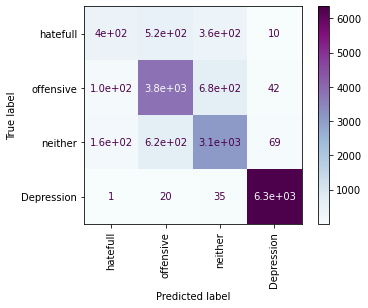

In [39]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.834734581159865
              precision    recall  f1-score   support

    hatefull       0.48      0.48      0.48      1291
   offensive       0.80      0.78      0.79      4672
     neither       0.75      0.77      0.76      3932
  Depression       0.98      0.99      0.99      6400

    accuracy                           0.83     16295
   macro avg       0.75      0.75      0.75     16295
weighted avg       0.83      0.83      0.83     16295



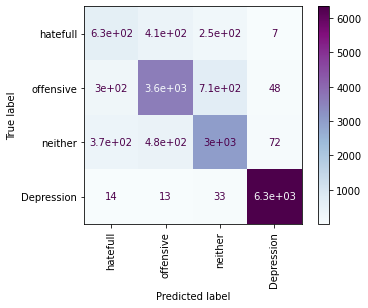

In [40]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

# Google Encoding With Mixed Data, Depression and Tobacco

In [41]:
data=pd.concat([data,data3])
data.dropna(inplace=True)
data.label.value_counts()

4    32000
1    23362
2    19658
0     6453
3     2116
Name: label, dtype: int64

In [42]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(text):
    return model(text)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [43]:
y=data['label']
x=data['tweet']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)

print(X_test.shape, y_test.shape)


(66871,) (66871,)
(16718,) (16718,)


In [46]:
X_train_tweet = embed(list(X_train))
#X_cv_tweet = embed(list(X_cv))

X_test_tweet = embed(list(X_test))

print("After Embedding vectorizations")
print(X_train_tweet.shape, y_train.shape)
#print(X_cv_tweet.shape, y_cv.shape)
print(X_test_tweet.shape, y_test.shape)
print("="*100)

After Embedding vectorizations
(66871, 512) (66871,)
(16718, 512) (16718,)


In [47]:
labels_=['hatefull','offensive','neither','Tobacco','Depression']

Start training...done!
Start testing...done!
accuracy: 0.8364038760617298
              precision    recall  f1-score   support

    hatefull       0.56      0.30      0.39      1291
   offensive       0.76      0.82      0.79      4672
     neither       0.73      0.78      0.76      3932
     Tobacco       0.96      0.90      0.93       423
  Depression       0.98      0.99      0.99      6400

    accuracy                           0.84     16718
   macro avg       0.80      0.76      0.77     16718
weighted avg       0.83      0.84      0.83     16718



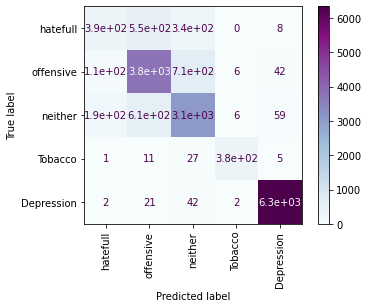

In [48]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.8295848785739921
              precision    recall  f1-score   support

    hatefull       0.47      0.47      0.47      1291
   offensive       0.80      0.76      0.78      4672
     neither       0.74      0.76      0.75      3932
     Tobacco       0.86      0.94      0.90       423
  Depression       0.98      0.99      0.98      6400

    accuracy                           0.83     16718
   macro avg       0.77      0.78      0.78     16718
weighted avg       0.83      0.83      0.83     16718



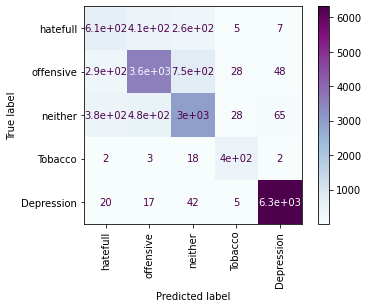

In [49]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

# Google Encoding with Depression and Tobacco

In [50]:
data2=pd.read_csv("depression.csv")
data2.drop("Unnamed: 0",axis=1,inplace=True)
data2

,tweet,label
0,damn taking this personality quiz and realizin...,4
1,remember experiencing as kid what now realize ...,4
2,damn louis really did pull me out of my depres...,4
3,my depression is really kicking my ass right n...,4
4,feel like my night is going bad family calling...,4
...,...,...
61995,the only way they can attract good dicks is to...,2
61996,gotta say like you think we have the same atti...,2
61997,many product companies goes from right to left...,2
61998,just casually playing animal crossing while wa...,2


In [51]:
mask=data2.label==4
data2=data2.loc[mask]
data2

,tweet,label
0,damn taking this personality quiz and realizin...,4
1,remember experiencing as kid what now realize ...,4
2,damn louis really did pull me out of my depres...,4
3,my depression is really kicking my ass right n...,4
4,feel like my night is going bad family calling...,4
...,...,...
46995,love that this is your life paul railing again...,4
46996,all see now why fucking hate cops they are mon...,4
46997,this really just breaks my heart on so many le...,4
46998,currently doing this now and relieved but also...,4


In [52]:
data=pd.read_csv("data_mixed_rt.csv")
data

,Unnamed: 0,tweet,label
0,0,conservatives are excellent at running up debt...,2
1,1,great example as an immigrant and woman ceo i...,2
2,2,fuckhead for awhile i open two stores for...,2
3,3,i just cracked my motherfuckin phone god damn ...,1
4,4,i could never have a bby by a lil dick thts...,1
...,...,...,...
49517,49524,aye and when the hoes start coming do not ...,1
49518,49525,kevin williamson is excellent piece on why e...,2
49519,49526,in an age where progressives demand full ...,2
49520,49527,all dirty vote bank politics aap rule has mad...,0


In [53]:
mask=data.label==2
data=data.loc[mask]
data.dropna(inplace=True)
data.drop("Unnamed: 0",axis=1,inplace=True)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,tweet,label
0,conservatives are excellent at running up debt...,2
1,great example as an immigrant and woman ceo i...,2
2,fuckhead for awhile i open two stores for...,2
5,what a hateful spiteful self righteous self...,2
6,as thousands flee violence in nicaragua un re...,2
...,...,...
49512,avoid this movie un american,2
49515,you knowmandni know you are on the verge from ...,2
49518,kevin williamson is excellent piece on why e...,2
49519,in an age where progressives demand full ...,2


In [54]:
data4=pd.concat([data,data2,data3])
data4.dropna(inplace=True)
data4.label.value_counts()

4    32000
2    19658
3     2116
Name: label, dtype: int64

In [55]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(text):
    return model(text)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [56]:
y=data4['label']
x=data4['tweet']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)

print(X_test.shape, y_test.shape)


(43019,) (43019,)
(10755,) (10755,)


In [63]:
X_train_tweet = embed(list(X_train))
#X_cv_tweet = embed(list(X_cv))

X_test_tweet = embed(list(X_test))

print("After Embedding vectorizations")
print(X_train_tweet.shape, y_train.shape)
#print(X_cv_tweet.shape, y_cv.shape)
print(X_test_tweet.shape, y_test.shape)
print("="*100)

After Embedding vectorizations
(43019, 512) (43019,)
(10755, 512) (10755,)


In [64]:
labels_=['neither','Tobacco','Depression']

Start training...done!
Start testing...done!
accuracy: 0.9816829381682938
              precision    recall  f1-score   support

     neither       0.98      0.97      0.98      3932
     Tobacco       0.97      0.93      0.95       423
  Depression       0.99      0.99      0.99      6400

    accuracy                           0.98     10755
   macro avg       0.98      0.96      0.97     10755
weighted avg       0.98      0.98      0.98     10755



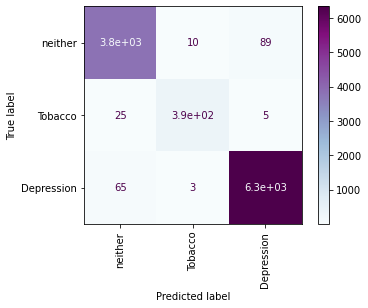

In [65]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.9808461180846119
              precision    recall  f1-score   support

     neither       0.98      0.97      0.98      3932
     Tobacco       0.94      0.94      0.94       423
  Depression       0.99      0.99      0.99      6400

    accuracy                           0.98     10755
   macro avg       0.97      0.97      0.97     10755
weighted avg       0.98      0.98      0.98     10755



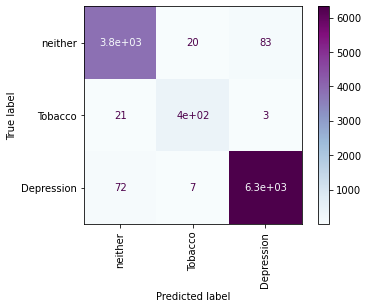

In [66]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

In [ ]:
def train_test_model(model, X_train, pulp_test, y_train,labels):
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print("="*80)
    print('Start testing...', end='')
    predictions = model.predict(pulp_test)
    print('done!')
    print("="*80)
    return predictions

In [ ]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions = train_test_model(log_model, X_train_tweet, pulp_test, y_train, labels_)

print(predictions)

In [ ]:
def change_label(text):
    if text==0:
        return "Hate"
    if text==1:
        return 'Offensive'
    if text==2:
        return 'Neither'
    else:
        return 'Tobacco'
            

In [ ]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions3= train_test_model(svm, X_train_tweet, pulp_test, y_train, labels_)


print(predictions3)

In [ ]:
log_data=data1.copy()
log_data['label']=predictions
log_data.label=log_data.label.apply(change_label)

In [ ]:
a=log_data.label.value_counts()
a

In [ ]:
svm_data=data1.copy()
svm_data['label']=predictions3
svm_data.label=svm_data.label.apply(change_label)

In [ ]:
b=svm_data.label.value_counts()
b

In [ ]:
a=a.to_dict()
b=b.to_dict()

In [ ]:
!pip install prettytable

In [ ]:
from prettytable import PrettyTable

x=PrettyTable()
x.field_names=['Models','Hate','Offensive','Neither',"Tobacco"]
x.add_row(["Linear SVM",b['Hate'],b['Offensive'],b['Neither'],b['Tobacco']])
x.add_row(["Logistic Regression",a['Hate'],a['Offensive'],a['Neither'],a['Tobacco']])
print(x)

In [ ]:
mask=log_data.label=='Hate'
class_0=log_data[mask]
class_0.to_csv('Hate_dialogues_pulp_fiction.csv')
class_0.head(5)

In [ ]:
rt=pd.DataFrame(m)
rt

,0
0,The magic will happen when you stop listening ...
1,When you’re depressed you don’t control your t...
2,The feeling when someone asks you if you’re ok...
3,"Depression on my left, loneliness on my right...."
4,"There is hope, even when your brain tells you ..."
...,...
166,Crying is one of the highest devotional songs....
167,"People talk about physical fitness, but mental..."
168,Whenever I have a good few months and I think ...
169,"You are the one thing in this world, above all..."


In [ ]:
rt.rename(columns={0:"text"},inplace=True)
rt['label']="depression"
rt

,text,label
0,The magic will happen when you stop listening ...,depression
1,When you’re depressed you don’t control your t...,depression
2,The feeling when someone asks you if you’re ok...,depression
3,"Depression on my left, loneliness on my right....",depression
4,"There is hope, even when your brain tells you ...",depression
...,...,...
166,Crying is one of the highest devotional songs....,depression
167,"People talk about physical fitness, but mental...",depression
168,Whenever I have a good few months and I think ...,depression
169,"You are the one thing in this world, above all...",depression


In [ ]:
data0=pd.read_csv("Suicide_Detection.csv")
data0

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [ ]:
k=np.random.randint(150000,len(data0),(300))
data1=data0.loc[k]
data1['class'].value_counts()

suicide        151
non-suicide    149
Name: class, dtype: int64

In [ ]:
mask=data1['class']=='suicide'
data2=data1.loc[mask]
data2

,Unnamed: 0,text,class
230244,345339,I am going to hang myself tonight. I refuse to...,suicide
155126,232755,Any other late teen/early 20 males wanna talk?...,suicide
185354,278210,I deserve to dieWell...i really tried to stay ...,suicide
193545,290546,It’s all my faultI tried. I did my best. I lov...,suicide
178859,268453,Imagining 1000s ways to suicide but couldn't d...,suicide
...,...,...,...
162311,243528,sick of stupid shit.I can't think. I can't con...,suicide
214721,322063,Can't find meaning in anythingHonestly I can't...,suicide
197160,295850,[NEED HELP] Roommate left a possible suicide n...,suicide
184883,277486,Interested in your inputI guess if this would ...,suicide


In [ ]:
data2.drop("Unnamed: 0",axis=1,inplace=True)
data2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,text,class
230244,I am going to hang myself tonight. I refuse to...,suicide
155126,Any other late teen/early 20 males wanna talk?...,suicide
185354,I deserve to dieWell...i really tried to stay ...,suicide
193545,It’s all my faultI tried. I did my best. I lov...,suicide
178859,Imagining 1000s ways to suicide but couldn't d...,suicide
...,...,...
162311,sick of stupid shit.I can't think. I can't con...,suicide
214721,Can't find meaning in anythingHonestly I can't...,suicide
197160,[NEED HELP] Roommate left a possible suicide n...,suicide
184883,Interested in your inputI guess if this would ...,suicide


In [ ]:
data3=pd.read_csv("data_mixed_rt.csv")
data3

,Unnamed: 0,tweet,label
0,0,conservatives are excellent at running up debt...,2
1,1,great example as an immigrant and woman ceo i...,2
2,2,fuckhead for awhile i open two stores for...,2
3,3,i just cracked my motherfuckin phone god damn ...,1
4,4,i could never have a bby by a lil dick thts...,1
...,...,...,...
49517,49524,aye and when the hoes start coming do not ...,1
49518,49525,kevin williamson is excellent piece on why e...,2
49519,49526,in an age where progressives demand full ...,2
49520,49527,all dirty vote bank politics aap rule has mad...,0


In [ ]:
data3.drop("Unnamed: 0",axis=1,inplace=True)
mask=data3.label==2
data4=data3.loc[mask]
k=np.random.randint(0,len(data4),(300))
data9=data4.iloc[k]
data9

,tweet,label
7120,immigrants amp community colleges our stud...,2
12940,what say you now i guess it is for liberals...,2
17895,NaN,2
13252,it is from assad syrian refugees flee not the...,2
34525,do not sell me dreams cause i will return them...,2
...,...,...
34971,new post in switzerland people have managed...,2
6931,he is here every one on council is here,2
28129,bitch and you froze mine now how am i gonna g...,2
19110,stand with america,2


In [ ]:
data9.dropna(inplace=True)
data9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,label
7120,immigrants amp community colleges our stud...,2
12940,what say you now i guess it is for liberals...,2
13252,it is from assad syrian refugees flee not the...,2
34525,do not sell me dreams cause i will return them...,2
47639,you are the cup holder,2
...,...,...
34971,new post in switzerland people have managed...,2
6931,he is here every one on council is here,2
28129,bitch and you froze mine now how am i gonna g...,2
19110,stand with america,2


In [ ]:
data9.rename(columns={"tweet":"text"},inplace=True)
data2.rename(columns={"class":'label'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data9

,text,label
7120,immigrants amp community colleges our stud...,2
12940,what say you now i guess it is for liberals...,2
13252,it is from assad syrian refugees flee not the...,2
34525,do not sell me dreams cause i will return them...,2
47639,you are the cup holder,2
...,...,...
34971,new post in switzerland people have managed...,2
6931,he is here every one on council is here,2
28129,bitch and you froze mine now how am i gonna g...,2
19110,stand with america,2


In [ ]:
data2

,text,label
230244,I am going to hang myself tonight. I refuse to...,suicide
155126,Any other late teen/early 20 males wanna talk?...,suicide
185354,I deserve to dieWell...i really tried to stay ...,suicide
193545,It’s all my faultI tried. I did my best. I lov...,suicide
178859,Imagining 1000s ways to suicide but couldn't d...,suicide
...,...,...
162311,sick of stupid shit.I can't think. I can't con...,suicide
214721,Can't find meaning in anythingHonestly I can't...,suicide
197160,[NEED HELP] Roommate left a possible suicide n...,suicide
184883,Interested in your inputI guess if this would ...,suicide


In [ ]:
rt

,text,label
0,The magic will happen when you stop listening ...,depression
1,When you’re depressed you don’t control your t...,depression
2,The feeling when someone asks you if you’re ok...,depression
3,"Depression on my left, loneliness on my right....",depression
4,"There is hope, even when your brain tells you ...",depression
...,...,...
166,Crying is one of the highest devotional songs....,depression
167,"People talk about physical fitness, but mental...",depression
168,Whenever I have a good few months and I think ...,depression
169,"You are the one thing in this world, above all...",depression


In [ ]:
data9.label="normal"

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data9

,text,label
7120,immigrants amp community colleges our stud...,normal
12940,what say you now i guess it is for liberals...,normal
13252,it is from assad syrian refugees flee not the...,normal
34525,do not sell me dreams cause i will return them...,normal
47639,you are the cup holder,normal
...,...,...
34971,new post in switzerland people have managed...,normal
6931,he is here every one on council is here,normal
28129,bitch and you froze mine now how am i gonna g...,normal
19110,stand with america,normal


In [ ]:
rt_data=pd.concat([rt,data2,data9],ignore_index=True)
rt_data.label.value_counts()

normal        298
depression    171
suicide       151
Name: label, dtype: int64

In [ ]:
rt_data.dropna(inplace=True)
rt_data.shape

(620, 2)

In [ ]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import preprocessor as p
from nltk.stem import WordNetLemmatizer 
from nltk import sent_tokenize
from nltk import word_tokenize

stop_words = stopwords.words()

def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    
    #using full form in place of abbrevations
    text = re.sub(r"won't", "will not",text)
    text = re.sub(r"can\'t", "can not",text)
    text = re.sub(r"n\'t", " not",text)
    text = re.sub(r"\'re", " are",text)
    text = re.sub(r"\'s", " is",text)
    text = re.sub(r"\'d", " would",text)
    text = re.sub(r"\'ll", " will",text)
    text = re.sub(r"\'t", " not",text)
    text = re.sub(r"\'ve", " have",text)
    text = re.sub(r"\'m", " am",text)
    text = re.sub('RT'," ", text)
    
    text=p.clean(text)
    text = re.sub("\$RESERVED\$ \$MENTION\$|\$NUMBER\$|\$MENTION\$",' ', text)
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[’“”…]', ' ', text)   
    
    
    text = re.sub('user'," ", text)
    text = re.sub('url'," ", text)
    
    text = re.sub('reserved'," ", text)
    
    
    
    
    
    
    text = re.sub("[^A-Za-z]",' ',text)
    

    # removing the emojies               
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r' ', text)   
    
    
    
    
    
    
    return text



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
rt_data.text=rt_data.text.apply(cleaning)
rt_data

,text,label
0,the magic will happen when you stop listening ...,depression
1,when youre depressed you dont control your tho...,depression
2,the feeling when someone asks you if youre oka...,depression
3,depression on my left loneliness on my right ...,depression
4,there is hope even when your brain tells you ...,depression
...,...,...
615,new post in switzerland people have managed to...,normal
616,he is here every one on council is here,normal
617,bitch and you froze mine now how am i gonna ge...,normal
618,stand with america,normal


In [ ]:
k=np.random.choice(range(620), 620, replace=False)

In [ ]:
DATA=rt_data.loc[k]
DATA

,text,label
616,he is here every one on council is here,normal
460,how many women commited jouhar to avoid rape a...,normal
372,well you are dumped,normal
287,could you guys go say hey to this guy for me...,suicide
136,depression is the inability to construct a fut...,depression
...,...,...
584,bitch you are so brave and smart and hysterica...,normal
219,im almost done i posted on here months ago say...,suicide
394,says he is the best tx he is for ending open b...,normal
18,the perfect is the enemy of the good,depression


In [ ]:
DATA.to_csv("dummy_data.csv")

In [ ]:
b=list(k)
b.sort()
print(b)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
a = np.arange(20)
z=np.random.shuffle(a)
print(z[:])

TypeError: ignored

In [ ]:
import numpy as np
o=np.random.choice(range(20), 20, replace=False)
o

array([15, 12,  1, 16, 17,  0,  8, 19,  3, 13,  6,  9, 10, 14,  7,  4,  5,
        2, 18, 11])

In [ ]:
len(o)

20

In [ ]:
o.sort()

In [ ]:
o

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])